In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


 ## Data Processing

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
X = iris.drop('species',axis=1)
y = iris['species']

In [6]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
scaled_X_train = scaler.transform(X_train)

In [13]:
scaled_X_test = scaler.transform(X_test)

### Creating the Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/Users/jaydip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jaydip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jaydip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jaydip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [15]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(patience=10)

In [18]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop])

Train on 120 samples, validate on 30 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/300
120/120 [==============================] - 0s 2ms/sample - loss: 1.0714 - acc: 0.3333 - val_loss: 1.0978 - val_acc: 0.3333
Epoch 2/300
120/120 [==============================] - 0s 99us/sample - loss: 1.0677 - acc: 0.3333 - val_loss: 1.0937 - val_acc: 0.3333
Epoch 3/300
120/120 [==============================] - 0s 129us/sample - loss: 1.0641 - acc: 0.3333 - val_loss: 1.0899 - val_acc: 0.3333
Epoch 4/300
120/120 [==============================] - 0s 306us/sample - loss: 1.0608 - acc: 0.3333 - val_loss: 1.0862 - val_acc: 0.3333
Epoch 5/300
120/120 [==============================] - 0s 238us/sample - loss: 1.0574 - acc: 0.3333 - val_loss: 1.0825 - val_acc: 0.3333
Epoch 6/300
120/120 [==============================] - 0s 283us/sample - loss: 1.0541 - acc: 0.3333 - val_loss: 1.0787 - val_acc: 0.3333
Epoch 7/300
120/120 [==============================] - 0s 178us/sample - loss: 1.0508 - 

120/120 [==============================] - 0s 169us/sample - loss: 0.7707 - acc: 0.7167 - val_loss: 0.8040 - val_acc: 0.6667
Epoch 118/300
120/120 [==============================] - 0s 178us/sample - loss: 0.7682 - acc: 0.7167 - val_loss: 0.8018 - val_acc: 0.6667
Epoch 119/300
120/120 [==============================] - 0s 111us/sample - loss: 0.7657 - acc: 0.7250 - val_loss: 0.7994 - val_acc: 0.6667
Epoch 120/300
120/120 [==============================] - 0s 175us/sample - loss: 0.7632 - acc: 0.7250 - val_loss: 0.7971 - val_acc: 0.6667
Epoch 121/300
120/120 [==============================] - 0s 160us/sample - loss: 0.7607 - acc: 0.7250 - val_loss: 0.7949 - val_acc: 0.6667
Epoch 122/300
120/120 [==============================] - 0s 162us/sample - loss: 0.7583 - acc: 0.7250 - val_loss: 0.7928 - val_acc: 0.6667
Epoch 123/300
120/120 [==============================] - 0s 182us/sample - loss: 0.7558 - acc: 0.7250 - val_loss: 0.7907 - val_acc: 0.6667
Epoch 124/300
120/120 [==================

120/120 [==============================] - 0s 188us/sample - loss: 0.6306 - acc: 0.7250 - val_loss: 0.6816 - val_acc: 0.6667
Epoch 177/300
120/120 [==============================] - 0s 165us/sample - loss: 0.6285 - acc: 0.7250 - val_loss: 0.6796 - val_acc: 0.6667
Epoch 178/300
120/120 [==============================] - 0s 138us/sample - loss: 0.6264 - acc: 0.7250 - val_loss: 0.6776 - val_acc: 0.6667
Epoch 179/300
120/120 [==============================] - 0s 132us/sample - loss: 0.6243 - acc: 0.7250 - val_loss: 0.6758 - val_acc: 0.6667
Epoch 180/300
120/120 [==============================] - 0s 156us/sample - loss: 0.6222 - acc: 0.7250 - val_loss: 0.6737 - val_acc: 0.6667
Epoch 181/300
120/120 [==============================] - 0s 149us/sample - loss: 0.6201 - acc: 0.7250 - val_loss: 0.6717 - val_acc: 0.6667
Epoch 182/300
120/120 [==============================] - 0s 175us/sample - loss: 0.6181 - acc: 0.7250 - val_loss: 0.6697 - val_acc: 0.6667
Epoch 183/300
120/120 [==================

120/120 [==============================] - 0s 100us/sample - loss: 0.4571 - acc: 0.7917 - val_loss: 0.5070 - val_acc: 0.8000
Epoch 295/300
120/120 [==============================] - 0s 96us/sample - loss: 0.4561 - acc: 0.7917 - val_loss: 0.5060 - val_acc: 0.8000
Epoch 296/300
120/120 [==============================] - 0s 98us/sample - loss: 0.4552 - acc: 0.8000 - val_loss: 0.5050 - val_acc: 0.8000
Epoch 297/300
120/120 [==============================] - 0s 93us/sample - loss: 0.4543 - acc: 0.8000 - val_loss: 0.5040 - val_acc: 0.8000
Epoch 298/300
120/120 [==============================] - 0s 78us/sample - loss: 0.4534 - acc: 0.8000 - val_loss: 0.5030 - val_acc: 0.8000
Epoch 299/300
120/120 [==============================] - 0s 113us/sample - loss: 0.4525 - acc: 0.8000 - val_loss: 0.5020 - val_acc: 0.8000
Epoch 300/300
120/120 [==============================] - 0s 99us/sample - loss: 0.4516 - acc: 0.8000 - val_loss: 0.5010 - val_acc: 0.8000


### Model Evaluation

In [19]:
metrics = pd.DataFrame(model.history.history)

In [22]:
metrics

,loss,acc,val_loss,val_acc
0,1.071370,0.333333,1.097754,0.333333
1,1.067721,0.333333,1.093684,0.333333
2,1.064090,0.333333,1.089910,0.333333
3,1.060764,0.333333,1.086192,0.333333
4,1.057379,0.333333,1.082451,0.333333
...,...,...,...,...
295,0.455223,0.800000,0.505008,0.800000
296,0.454304,0.800000,0.504034,0.800000
297,0.453408,0.800000,0.503038,0.800000
298,0.452512,0.800000,0.502018,0.800000


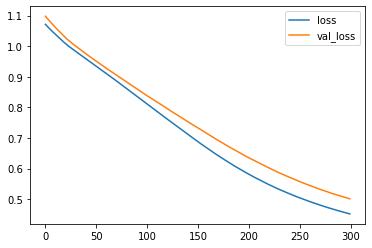

In [20]:
metrics[['loss','val_loss']].plot()

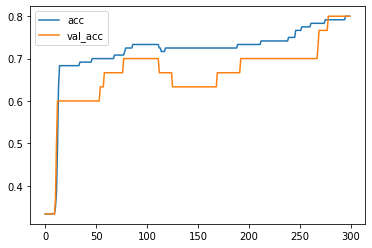

In [23]:
metrics[['acc','val_acc']].plot()

In [24]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.500988245010376, 0.8]

### Model for Deployment

In [25]:
epochs = len(metrics)

In [26]:
scaled_X = scaler.fit_transform(X)

In [27]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/300
150/150 [==============================] - 0s 2ms/sample - loss: 1.1163 - acc: 0.3267
Epoch 2/300
150/150 [==============================] - 0s 177us/sample - loss: 1.1107 - acc: 0.3267
Epoch 3/300
150/150 [==============================] - 0s 209us/sample - loss: 1.1043 - acc: 0.3400
Epoch 4/300
150/150 [==============================] - 0s 112us/sample - loss: 1.0985 - acc: 0.3333
Epoch 5/300
150/150 [==============================] - 0s 113us/sample - loss: 1.0926 - acc: 0.3267
Epoch 6/300
150/150 [==============================] - 0s 114us/sample - loss: 1.0869 - acc: 0.3267
Epoch 7/300
150/150 [==============================] - 0s 89us/sample - loss: 1.0814 - acc: 0.3133
Epoch 8/300
150/150 [==============================] - 0s 158us/sample - loss: 1.0754 - acc: 0.3133
Epoch 9/300
150/150 [==============================] - 0s 147us/sample - loss: 1.0703 - acc: 0.3267
Epoch 10/300
150/150 [==============================] - 0s 120us/sample - loss: 1.0646 - acc: 0.3200
Ep

150/150 [==============================] - 0s 212us/sample - loss: 0.4570 - acc: 0.9133
Epoch 163/300
150/150 [==============================] - 0s 149us/sample - loss: 0.4552 - acc: 0.9200
Epoch 164/300
150/150 [==============================] - 0s 137us/sample - loss: 0.4533 - acc: 0.9200
Epoch 165/300
150/150 [==============================] - 0s 132us/sample - loss: 0.4514 - acc: 0.9200
Epoch 166/300
150/150 [==============================] - 0s 152us/sample - loss: 0.4496 - acc: 0.9267
Epoch 167/300
150/150 [==============================] - 0s 84us/sample - loss: 0.4478 - acc: 0.9267
Epoch 168/300
150/150 [==============================] - 0s 102us/sample - loss: 0.4460 - acc: 0.9333
Epoch 169/300
150/150 [==============================] - 0s 100us/sample - loss: 0.4443 - acc: 0.9333
Epoch 170/300
150/150 [==============================] - 0s 105us/sample - loss: 0.4425 - acc: 0.9333
Epoch 171/300
150/150 [==============================] - 0s 148us/sample - loss: 0.4408 - acc: 0.

In [30]:
model.save("iris_model.h5")

In [31]:
#Saving Scaler

import joblib

In [32]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

### Predicting a Single New Flower

In [33]:
from tensorflow.keras.models import load_model

In [35]:
flower_model = load_model("iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

In [36]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [37]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [38]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
def return_prediction(model,scaler,sample_json):
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]

In [40]:
return_prediction(flower_model,flower_scaler,flower_example)

'setosa'

### DEPLOYMENT

In [41]:
from tensorflow.keras.models import load_model
import joblib


flower_model = load_model("iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]